<a href="https://colab.research.google.com/github/Farisandim379/7Summit/blob/main/Salinan_dari_KlasifikasiBatik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/annaamikom/dataset-batik.git

fatal: destination path 'dataset-batik' already exists and is not an empty directory.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
import os

# Definisikan path ke direktori Anda
# Ganti 'nama-repositori' dengan nama folder repositori Anda yang sebenarnya
base_dir = '/content/dataset-batik/dataset-batik'
train_dir = os.path.join(base_dir, 'training')
test_dir = os.path.join(base_dir, 'testing')

# Melihat beberapa file di dalam folder training
print("Contoh file di folder training:")
print(os.listdir(train_dir)[:5])

print("\nContoh file di folder testing:")
print(os.listdir(test_dir)[:5])

Contoh file di folder training:
['batik-cendrawasih', 'batik-megamendung', 'batik-kawung', 'batik-tambal', 'batik-parang']

Contoh file di folder testing:
['batik-cendrawasih', 'batik-megamendung', 'batik-kawung', 'batik-tambal', 'batik-parang']


In [ ]:
import pandas as pd
import os

def train_df(tr_path):
    classes = []
    class_paths = []
    files = os.listdir(tr_path)
    for file in files:
        label_dir = os.path.join(tr_path, file)
        label = os.listdir(label_dir)
        for image in label:
            image_path = os.path.join(label_dir, image)
            class_paths.append(image_path)
            classes.append(file)
    image_classes = pd.Series(classes, name='Class')
    image_paths = pd.Series(class_paths, name='Class Path')
    tr_df = pd.concat([image_paths, image_classes], axis=1)
    return tr_df

tr_df = train_df(train_dir)
tr_df.head()

,Class Path,Class
0,/content/dataset-batik/dataset-batik/training/...,batik-cendrawasih
1,/content/dataset-batik/dataset-batik/training/...,batik-cendrawasih
2,/content/dataset-batik/dataset-batik/training/...,batik-cendrawasih
3,/content/dataset-batik/dataset-batik/training/...,batik-cendrawasih
4,/content/dataset-batik/dataset-batik/training/...,batik-cendrawasih


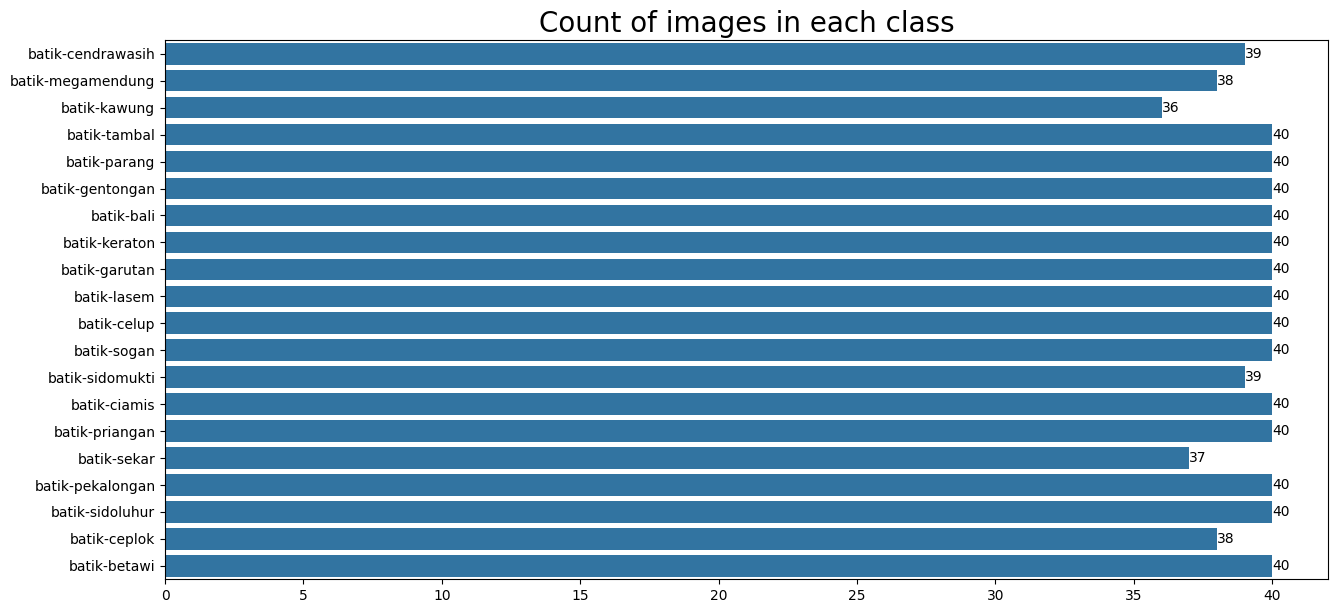

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of images in each class
plt.figure(figsize=(15,7))
ax = sns.countplot(data=tr_df , y=tr_df['Class'])

plt.xlabel('')
plt.ylabel('')
plt.title('Count of images in each class', fontsize=20)
ax.bar_label(ax.containers[0])
plt.show()

#Preprocessing

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Definisikan path ke direktori Anda
base_dir = '/content/dataset-batik'
train_dir = os.path.join(base_dir, 'dataset-batik', 'training')
test_dir = os.path.join(base_dir, 'dataset-batik', 'testing')

test_datagen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(240, 240),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 633 images belonging to 20 classes.
Found 154 images belonging to 20 classes.


#Model

In [ ]:
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(240,240,3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(256, (3,3), activation='relu', padding='same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(train_generator.num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 238, 238, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 119, 119, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 117, 117, 128)  │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 58, 58, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 56, 56, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 26, 26, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 13, 13, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 13, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 20)             │        10,260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,800,084 (22.13 MB)

 Trainable params: 5,800,084 (22.13 MB)

 Non-trainable params: 0 (0.00 B)

#Training Model

In [ ]:
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=val_generator
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - accuracy: 0.0334 - loss: 3.0296 - val_accuracy: 0.0455 - val_loss: 2.9957
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 913ms/step - accuracy: 0.0464 - loss: 2.9957 - val_accuracy: 0.0455 - val_loss: 2.9953
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 862ms/step - accuracy: 0.0696 - loss: 2.9952 - val_accuracy: 0.0714 - val_loss: 2.9373
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 952ms/step - accuracy: 0.0725 - loss: 2.9264 - val_accuracy: 0.0844 - val_loss: 2.9185
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 870ms/step - accuracy: 0.0541 - loss: 2.9976 - val_accuracy: 0.0455 - val_loss: 3.0111
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 983ms/step - accuracy: 0.0782 - loss: 2.9784 - val_accuracy: 0.0779 - val_loss: 2.9358
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 17s 866ms/step - accuracy: 0.1043 - loss: 2.9425 - val_accuracy: 0.0714 - val_loss: 2.9011
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 894ms/step - accuracy: 0.0945 - loss: 2.9281 - val_accurac

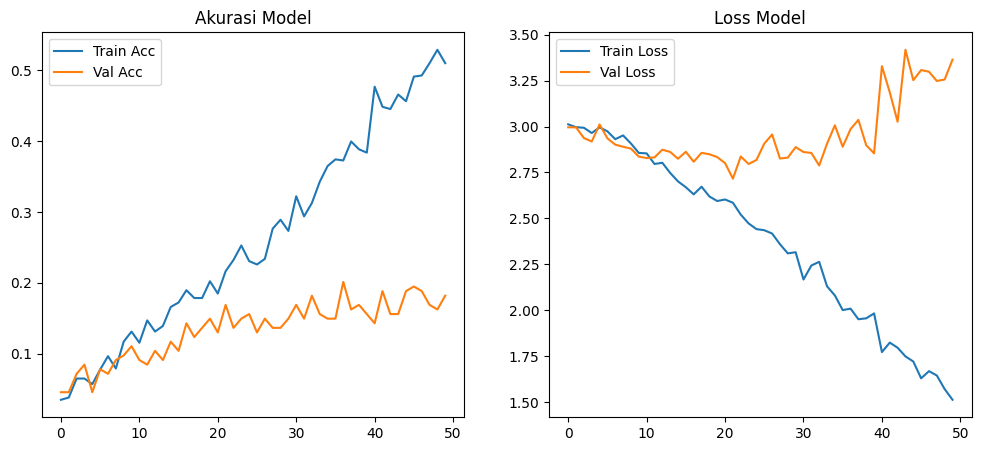

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Akurasi Model')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Model')
plt.legend()

plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create a separate ImageDataGenerator for the test set without augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

# If test folder is available
test_generator = test_datagen.flow_from_directory(
    '/content/dataset-batik/dataset-batik/testing',
    target_size=(240, 240),
    batch_size=16,
    class_mode='categorical',
    shuffle=False
)

test_loss, test_acc = model.evaluate(test_generator)
print(f"Akurasi pada data test: {test_acc*100:.2f}%")

Found 194 images belonging to 20 classes.
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 225ms/step - accuracy: 0.1723 - loss: 5.1077
Akurasi pada data test: 17.01%


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 780ms/step


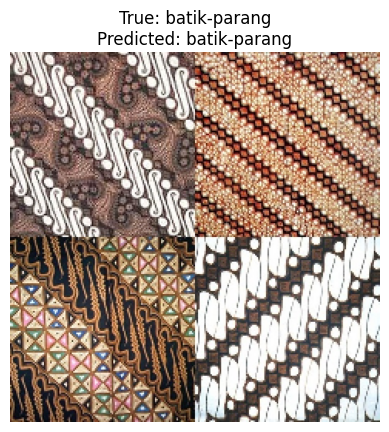

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


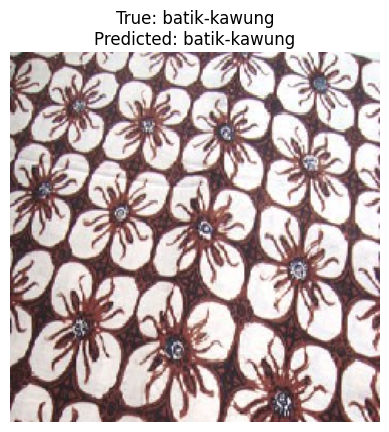

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


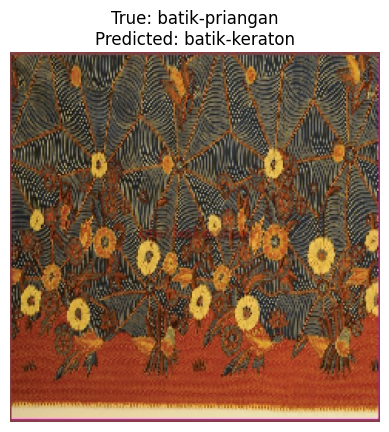

In [ ]:
import random
from tensorflow.keras.preprocessing import image
import os
import numpy as np # Import numpy

classes = list(train_generator.class_indices.keys())
sample_images = []

training_base_dir = os.path.join(base_dir, 'dataset-batik', 'training')

for label in classes:
    path = os.path.join(training_base_dir, label)
    sample_images += [(os.path.join(path, img), label) for img in os.listdir(path)] # Store image path and true label

samples = random.sample(sample_images, 3)

for path, true_label in samples: # Get both path and true_label
    img = image.load_img(path, target_size=(240, 240)) # Changed target_size to 240x240
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)
    predicted_class = classes[np.argmax(prediction)]

    plt.imshow(img)
    plt.title(f"True: {true_label}\nPredicted: {predicted_class}") # Display both true and predicted labels
    plt.axis('off')
    plt.show()